In [4]:
#LIB

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from xgboost import XGBRegressor
import seaborn as sns

In [5]:
#Load Data
df = pd.read_csv('BostonHousing.csv')
df = df.drop('chas', axis = 'columns')
features_names = df.columns.drop('medv')
target_names = ['medv']


In [8]:
#Data normalization

x = df.drop('medv', axis = 'columns').values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df_normalized.columns = features_names

In [9]:
#Train/Test split

X = df_normalized
y = df.medv
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, test_size=0.75)

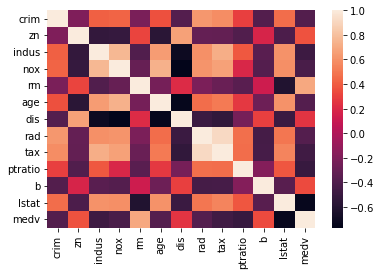

In [10]:
#Heatmap

corr = df.corr() #Corelation dataframe
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.show() #Heatmap plot


In [12]:
#LinearRegressionModel
LinearModel = LinearRegression()
LinearModel.fit(train_X,train_y)
prediction = LinearModel.predict(val_X)
Coef_df = pd.DataFrame(columns=features_names)
Coef_df.loc[0] = LinearModel.coef_
Coef_df.loc[0] = Coef_df.loc[0].apply(lambda x: abs(x))
Coef_df = Coef_df.sort_values(by=0, ascending=False, axis=1) #Od najbardziej waznych do najmniej waznych
r2_score_linear = r2_score(val_y,prediction)

In [15]:
#NN

NN_model = Sequential()
NN_model.add(Dense(3,input_dim=X.shape[1],activation = 'tanh'))
NN_model.add(Dense(3, activation = 'relu'))
NN_model.add(Dense(3, activation = 'relu'))
NN_model.add(Dense(1, activation = 'linear'))
NN_model.compile(loss='MeanSquaredError', optimizer='Adam', metrics=['MeanSquaredError'])
NN_model.fit(train_X, train_y, epochs=700)
prediction_NN = NN_model.predict(val_X)
r2_score_NN = r2_score(val_y,prediction_NN)

Epoch 1/700
4/4 [==============================] - 0s 2ms/step - loss: 607.3281 - mean_squared_error: 607.3281
Epoch 2/700
4/4 [==============================] - 0s 2ms/step - loss: 606.2581 - mean_squared_error: 606.2581
Epoch 3/700
4/4 [==============================] - 0s 1ms/step - loss: 605.1605 - mean_squared_error: 605.1605
Epoch 4/700
4/4 [==============================] - 0s 2ms/step - loss: 603.9878 - mean_squared_error: 603.9878
Epoch 5/700
4/4 [==============================] - 0s 2ms/step - loss: 602.8065 - mean_squared_error: 602.8065
Epoch 6/700
4/4 [==============================] - 0s 2ms/step - loss: 601.6501 - mean_squared_error: 601.6501
Epoch 7/700
4/4 [==============================] - 0s 2ms/step - loss: 600.3285 - mean_squared_error: 600.3284
Epoch 8/700
4/4 [==============================] - 0s 1ms/step - loss: 599.1127 - mean_squared_error: 599.1127
Epoch 9/700
4/4 [==============================] - 0s 2ms/step - loss: 597.7732 - mean_squared_error: 597.7732
E

4/4 [==============================] - 0s 2ms/step - loss: 272.7051 - mean_squared_error: 272.7051
Epoch 75/700
4/4 [==============================] - 0s 2ms/step - loss: 266.2623 - mean_squared_error: 266.2623
Epoch 76/700
4/4 [==============================] - 0s 1ms/step - loss: 259.6867 - mean_squared_error: 259.6867
Epoch 77/700
4/4 [==============================] - 0s 2ms/step - loss: 253.1572 - mean_squared_error: 253.1572
Epoch 78/700
4/4 [==============================] - 0s 2ms/step - loss: 246.9803 - mean_squared_error: 246.9803
Epoch 79/700
4/4 [==============================] - 0s 2ms/step - loss: 240.8933 - mean_squared_error: 240.8933
Epoch 80/700
4/4 [==============================] - 0s 2ms/step - loss: 234.8909 - mean_squared_error: 234.8909
Epoch 81/700
4/4 [==============================] - 0s 2ms/step - loss: 229.1967 - mean_squared_error: 229.1967
Epoch 82/700
4/4 [==============================] - 0s 2ms/step - loss: 223.1474 - mean_squared_error: 223.1474
Epoch

4/4 [==============================] - 0s 2ms/step - loss: 95.0299 - mean_squared_error: 95.0299
Epoch 148/700
4/4 [==============================] - 0s 2ms/step - loss: 94.8837 - mean_squared_error: 94.8837
Epoch 149/700
4/4 [==============================] - 0s 2ms/step - loss: 94.8197 - mean_squared_error: 94.8197
Epoch 150/700
4/4 [==============================] - 0s 2ms/step - loss: 94.7427 - mean_squared_error: 94.7427
Epoch 151/700
4/4 [==============================] - 0s 2ms/step - loss: 94.7471 - mean_squared_error: 94.7471
Epoch 152/700
4/4 [==============================] - 0s 2ms/step - loss: 94.6463 - mean_squared_error: 94.6463
Epoch 153/700
4/4 [==============================] - 0s 2ms/step - loss: 94.6283 - mean_squared_error: 94.6283
Epoch 154/700
4/4 [==============================] - 0s 2ms/step - loss: 94.5666 - mean_squared_error: 94.5666
Epoch 155/700
4/4 [==============================] - 0s 2ms/step - loss: 94.5239 - mean_squared_error: 94.5239
Epoch 156/700
4

4/4 [==============================] - 0s 2ms/step - loss: 93.2278 - mean_squared_error: 93.2278
Epoch 221/700
4/4 [==============================] - 0s 2ms/step - loss: 93.1758 - mean_squared_error: 93.1758
Epoch 222/700
4/4 [==============================] - 0s 2ms/step - loss: 93.1424 - mean_squared_error: 93.1424
Epoch 223/700
4/4 [==============================] - 0s 2ms/step - loss: 93.1046 - mean_squared_error: 93.1046
Epoch 224/700
4/4 [==============================] - 0s 2ms/step - loss: 93.0642 - mean_squared_error: 93.0642
Epoch 225/700
4/4 [==============================] - 0s 2ms/step - loss: 93.0186 - mean_squared_error: 93.0186
Epoch 226/700
4/4 [==============================] - 0s 2ms/step - loss: 92.9768 - mean_squared_error: 92.9768
Epoch 227/700
4/4 [==============================] - 0s 1ms/step - loss: 92.9299 - mean_squared_error: 92.9299
Epoch 228/700
4/4 [==============================] - 0s 1ms/step - loss: 92.8731 - mean_squared_error: 92.8731
Epoch 229/700
4

4/4 [==============================] - 0s 1ms/step - loss: 67.3403 - mean_squared_error: 67.3403
Epoch 294/700
4/4 [==============================] - 0s 2ms/step - loss: 67.0558 - mean_squared_error: 67.0558
Epoch 295/700
4/4 [==============================] - 0s 2ms/step - loss: 66.7651 - mean_squared_error: 66.7651
Epoch 296/700
4/4 [==============================] - 0s 1ms/step - loss: 66.4860 - mean_squared_error: 66.4860
Epoch 297/700
4/4 [==============================] - 0s 1ms/step - loss: 66.1711 - mean_squared_error: 66.1711
Epoch 298/700
4/4 [==============================] - 0s 2ms/step - loss: 65.9121 - mean_squared_error: 65.9121
Epoch 299/700
4/4 [==============================] - 0s 1ms/step - loss: 65.6015 - mean_squared_error: 65.6015
Epoch 300/700
4/4 [==============================] - 0s 2ms/step - loss: 65.3139 - mean_squared_error: 65.3139
Epoch 301/700
4/4 [==============================] - 0s 1ms/step - loss: 65.0410 - mean_squared_error: 65.0410
Epoch 302/700
4

4/4 [==============================] - 0s 2ms/step - loss: 49.0742 - mean_squared_error: 49.0742
Epoch 367/700
4/4 [==============================] - 0s 2ms/step - loss: 48.9294 - mean_squared_error: 48.9294
Epoch 368/700
4/4 [==============================] - 0s 1ms/step - loss: 48.7746 - mean_squared_error: 48.7746
Epoch 369/700
4/4 [==============================] - 0s 2ms/step - loss: 48.6043 - mean_squared_error: 48.6043
Epoch 370/700
4/4 [==============================] - 0s 1ms/step - loss: 48.4665 - mean_squared_error: 48.4665
Epoch 371/700
4/4 [==============================] - 0s 2ms/step - loss: 48.3209 - mean_squared_error: 48.3209
Epoch 372/700
4/4 [==============================] - 0s 2ms/step - loss: 48.1393 - mean_squared_error: 48.1393
Epoch 373/700
4/4 [==============================] - 0s 2ms/step - loss: 48.0058 - mean_squared_error: 48.0058
Epoch 374/700
4/4 [==============================] - 0s 2ms/step - loss: 47.8603 - mean_squared_error: 47.8603
Epoch 375/700
4

4/4 [==============================] - 0s 1ms/step - loss: 37.7626 - mean_squared_error: 37.7626
Epoch 440/700
4/4 [==============================] - 0s 1ms/step - loss: 37.6314 - mean_squared_error: 37.6314
Epoch 441/700
4/4 [==============================] - 0s 1ms/step - loss: 37.4116 - mean_squared_error: 37.4116
Epoch 442/700
4/4 [==============================] - 0s 1ms/step - loss: 37.2474 - mean_squared_error: 37.2474
Epoch 443/700
4/4 [==============================] - 0s 1ms/step - loss: 37.1012 - mean_squared_error: 37.1012
Epoch 444/700
4/4 [==============================] - 0s 1ms/step - loss: 36.9617 - mean_squared_error: 36.9617
Epoch 445/700
4/4 [==============================] - 0s 2ms/step - loss: 36.7546 - mean_squared_error: 36.7546
Epoch 446/700
4/4 [==============================] - 0s 1ms/step - loss: 36.6061 - mean_squared_error: 36.6061
Epoch 447/700
4/4 [==============================] - 0s 2ms/step - loss: 36.4580 - mean_squared_error: 36.4580
Epoch 448/700
4

4/4 [==============================] - 0s 2ms/step - loss: 27.6293 - mean_squared_error: 27.6293
Epoch 513/700
4/4 [==============================] - 0s 1ms/step - loss: 27.5382 - mean_squared_error: 27.5382
Epoch 514/700
4/4 [==============================] - 0s 2ms/step - loss: 27.4770 - mean_squared_error: 27.4770
Epoch 515/700
4/4 [==============================] - 0s 2ms/step - loss: 27.4503 - mean_squared_error: 27.4503
Epoch 516/700
4/4 [==============================] - 0s 2ms/step - loss: 27.2943 - mean_squared_error: 27.2943
Epoch 517/700
4/4 [==============================] - 0s 2ms/step - loss: 27.1979 - mean_squared_error: 27.1979
Epoch 518/700
4/4 [==============================] - 0s 3ms/step - loss: 27.1019 - mean_squared_error: 27.1019
Epoch 519/700
4/4 [==============================] - 0s 2ms/step - loss: 27.0442 - mean_squared_error: 27.0442
Epoch 520/700
4/4 [==============================] - 0s 2ms/step - loss: 26.9413 - mean_squared_error: 26.9413
Epoch 521/700
4

4/4 [==============================] - 0s 1ms/step - loss: 23.4528 - mean_squared_error: 23.4528
Epoch 586/700
4/4 [==============================] - 0s 2ms/step - loss: 23.4006 - mean_squared_error: 23.4006
Epoch 587/700
4/4 [==============================] - 0s 2ms/step - loss: 23.3723 - mean_squared_error: 23.3723
Epoch 588/700
4/4 [==============================] - 0s 2ms/step - loss: 23.3536 - mean_squared_error: 23.3536
Epoch 589/700
4/4 [==============================] - 0s 1ms/step - loss: 23.2939 - mean_squared_error: 23.2939
Epoch 590/700
4/4 [==============================] - 0s 2ms/step - loss: 23.2818 - mean_squared_error: 23.2818
Epoch 591/700
4/4 [==============================] - 0s 2ms/step - loss: 23.2721 - mean_squared_error: 23.2721
Epoch 592/700
4/4 [==============================] - 0s 1ms/step - loss: 23.2100 - mean_squared_error: 23.2100
Epoch 593/700
4/4 [==============================] - 0s 2ms/step - loss: 23.1682 - mean_squared_error: 23.1682
Epoch 594/700
4

4/4 [==============================] - 0s 1ms/step - loss: 21.5136 - mean_squared_error: 21.5136
Epoch 659/700
4/4 [==============================] - 0s 1ms/step - loss: 21.5126 - mean_squared_error: 21.5126
Epoch 660/700
4/4 [==============================] - 0s 1ms/step - loss: 21.4944 - mean_squared_error: 21.4944
Epoch 661/700
4/4 [==============================] - 0s 2ms/step - loss: 21.4595 - mean_squared_error: 21.4595
Epoch 662/700
4/4 [==============================] - 0s 2ms/step - loss: 21.4453 - mean_squared_error: 21.4453
Epoch 663/700
4/4 [==============================] - 0s 2ms/step - loss: 21.4302 - mean_squared_error: 21.4302
Epoch 664/700
4/4 [==============================] - 0s 2ms/step - loss: 21.4046 - mean_squared_error: 21.4046
Epoch 665/700
4/4 [==============================] - 0s 1ms/step - loss: 21.3623 - mean_squared_error: 21.3623
Epoch 666/700
4/4 [==============================] - 0s 2ms/step - loss: 21.3670 - mean_squared_error: 21.3670
Epoch 667/700
4

In [16]:
#XGBRegressor

XGB_model = XGBRegressor()
XGB_model.fit(train_X,train_y)
prediction_XGB = XGB_model.predict(val_X)
r2_score_XGB = r2_score(val_y,prediction_XGB)



In [17]:
#R2SCORE

print("Linear regression R2score:", r2_score_linear)
print("Small NN R2score:", r2_score_NN)
print("XGB r2score:", r2_score_XGB)

Linear regression R2score: 0.7048259296256516
Small NN R2score: 0.7561564848311271
XGB r2score: 0.7991583069832422


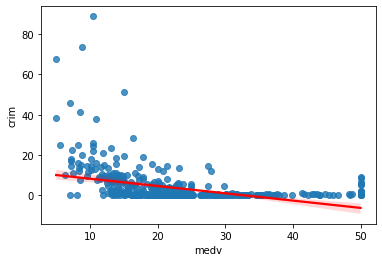

In [18]:
#Medv and Crim scatter

sns.regplot(x='medv', y='crim', data=df, line_kws={'color': 'red'})
plt.show()


C:\Users\marcin\AppData\Local\Temp/ipykernel_10392/4058280656.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


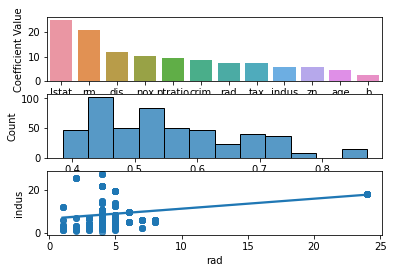

In [19]:
#Dashboard

dfm = Coef_df.melt(var_name='Column Names', value_name='Coefficient Value')
fig, axs = plt.subplots(3,1)
sns.barplot(x='Column Names', y='Coefficient Value', data=dfm, ax=axs[0])
sns.histplot(data=df, x='nox', ax=axs[1])
sns.regplot(x='rad', y='indus', data=df, ax=axs[2])
fig.show()
